# Árvores

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Árvores de decisão

<img src="https://miro.medium.com/max/899/0*Wy3QjtXL9qf-Ssyz.jpg" width=800>

###  

## Árvores de Decisão

Para começar vamos entender qual é a estrutura de uma árvore de decisão:

###  

**Alguns exemplos de aplicações de Árvores de Decisão:** <br>

<img src="https://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif" width=500>

<br><br>

<img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width=500>

<br><br>

Vamos tomar a decisão baseada na tabela abaixo!  

Qual seria o nó raiz?  
  
<img src=" 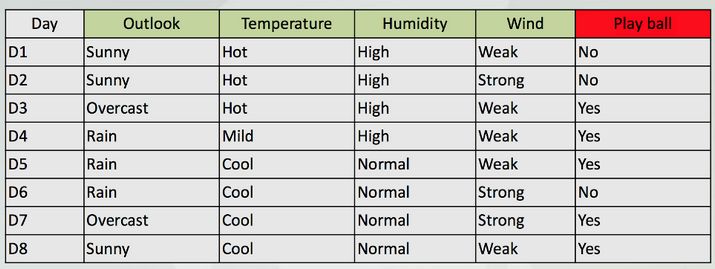" >

Quando trabalhamos com múltiplas variáveis, como definir qual variável vamos utilizar primeiro para o Nó?

Vamos utilizar o exemplo de uma amostra de 30 alunos com duas variáveis: Sexo (menino ou menina), Classe (IX ou X). Além disso 15 dos 30 alunos jogam tênis no intervalo. Dado isso, a pergunta que fica é: **Qual variável/feature utilizar para fazer a quebra do nó raiz: sexo ou classe?**

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**.

Como decidir então, qual das quebras acima **separou melhor os dados com relação ao target?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

###  

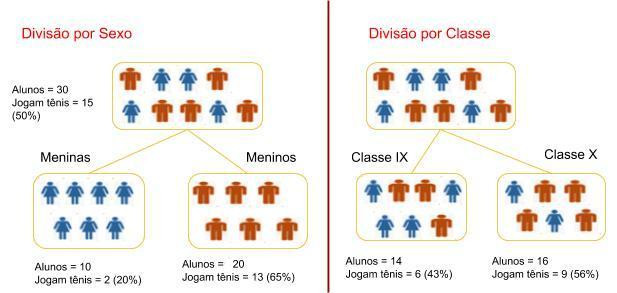

### **Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as proporções de separação do target em cada quebra.

OBS:   
- É **PROPORÇÃO** e **NÃO PROBABILIDADE**. Proporção eu tenho certeza, probabilidade não.  
- Indíce zero(0) é um nó puro
    - Todos os elementos são da mesma classe  
  
Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados: 

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

- Divisão por **sexo**: após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima: 

    - $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$
    
    - $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{10}{30} \times G(\text{meninas}) + \frac{20}{30} \times G(\text{meninos})
    = 0.33 \times 0.319 + 0.66 \times 0.454
    = 0.40491$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:
    
    <br>
    
    - $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = $ **0.095**
    
    
<br> 

<table>
<thead>
  <tr>
    <th colspan="4"><center>Classe</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Classe IX</center></td>
    <td colspan="2"><center>Classe X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>



- Divisão por **classe**: após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$
    
    - $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
    = 0.46 \times 0.489 + 0.53 \times 0.492
    = 0.4857$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:
    
    <br>
    
    - $\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = $ **0.014**
  
Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior perda de impureza**, ou, equivalentemente, **a maior purificação**.

Assim, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes.

<img src=" 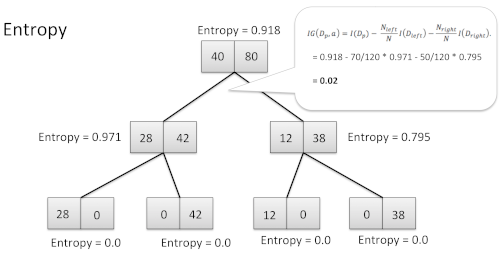" >

### **Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$E = -\sum{p_{i} \times \log_{2}{p_{i}}}$$
 
 
Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. 
 
Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**: 

$$E(pré-divisão) = -1 \times (\frac{15}{30}log_{2}{\frac{15}{30}} + \frac{15}{30}log_{2}{\frac{15}{30}}) = 1$$


Temos duas quebras possíveis:

- Divisão por sexo: 

    - $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$
    
    Assim, o ganho de informação após a divisão por **sexo** é:
    
    <br>
    
    - $\Delta E_{\text{sexo}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.863 =$ **0.137**

<br>

- Divisão por classe:

    - $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
    - $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$
    
    A entropia ponderada após a divisão por **classe** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{14}{30} \times E(\text{IX}) + \frac{16}{30} \times E(\text{X}) =  0.986$
    
    Assim, o ganho de informação após a divisão por **classe** é:
    
    <br>
    
    - $\Delta E_{\text{classe}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.986 =$ **0.014**

Também pela entropia, a divisão a ser escolhida seria por **sexo**. 

Depois, **aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros**.

### Gini x Entropia
A Impureza de Gini e a Entropia têm duas diferenças principais:

> 1. A Impureza de Gini tem valores dentro do intervalo [0, 0.5] enquanto que o intervalo da Entropia é [0, 1]. Na figura a seguir, ambos estão representados. O índice de Gini também foi representado multiplicado por dois para ver concretamente as diferenças entre eles, que não são muito significativas.
<br>

> 2. Computacionalmente, a entropia é mais complexa, pois faz uso de logaritmos e, consequentemente, o cálculo da Impureza de Gini será mais rápido.

<img src=" 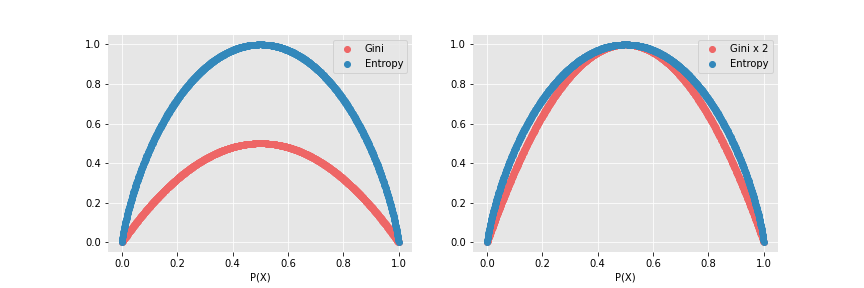"  style="width:500px" />



Fonte: https://quantdare.com/decision-trees-gini-vs-entropy/

https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf

A **diferença do Gini e da Entropia** é minimamente computacional, e olhando para o lado do resultado do modelo apesar das medidas poderem ser semelhantes.

E qual critério utilizar? (Caso encontre novas referências compartilhe)  
https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf
- We found that they disagree only in 2% of all cases
- Calcular log é mais caro computacionalmente
- A "vantagem" logaritmica é justamente quando o valor percorre uma gama grande de valores

###  

### Exemplos

Vamos a nosso exemplo prático?

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Para esse exemplo iremos utilizar um dataset sobre [Heart Failure](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data), para ter mais detalhes sobre a base de dados, podemos dar uma olhada na documentação no Kaggle.

In [49]:
df = pd.read_csv('dados_modelo/heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [51]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [52]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [53]:
colunas = df.columns

for coluna in colunas:
    print(f'{coluna}: {df[coluna].nunique()}')

age: 47
anaemia: 2
creatinine_phosphokinase: 208
diabetes: 2
ejection_fraction: 17
high_blood_pressure: 2
platelets: 176
serum_creatinine: 40
serum_sodium: 27
sex: 2
smoking: 2
time: 148
DEATH_EVENT: 2


Documentação para o [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

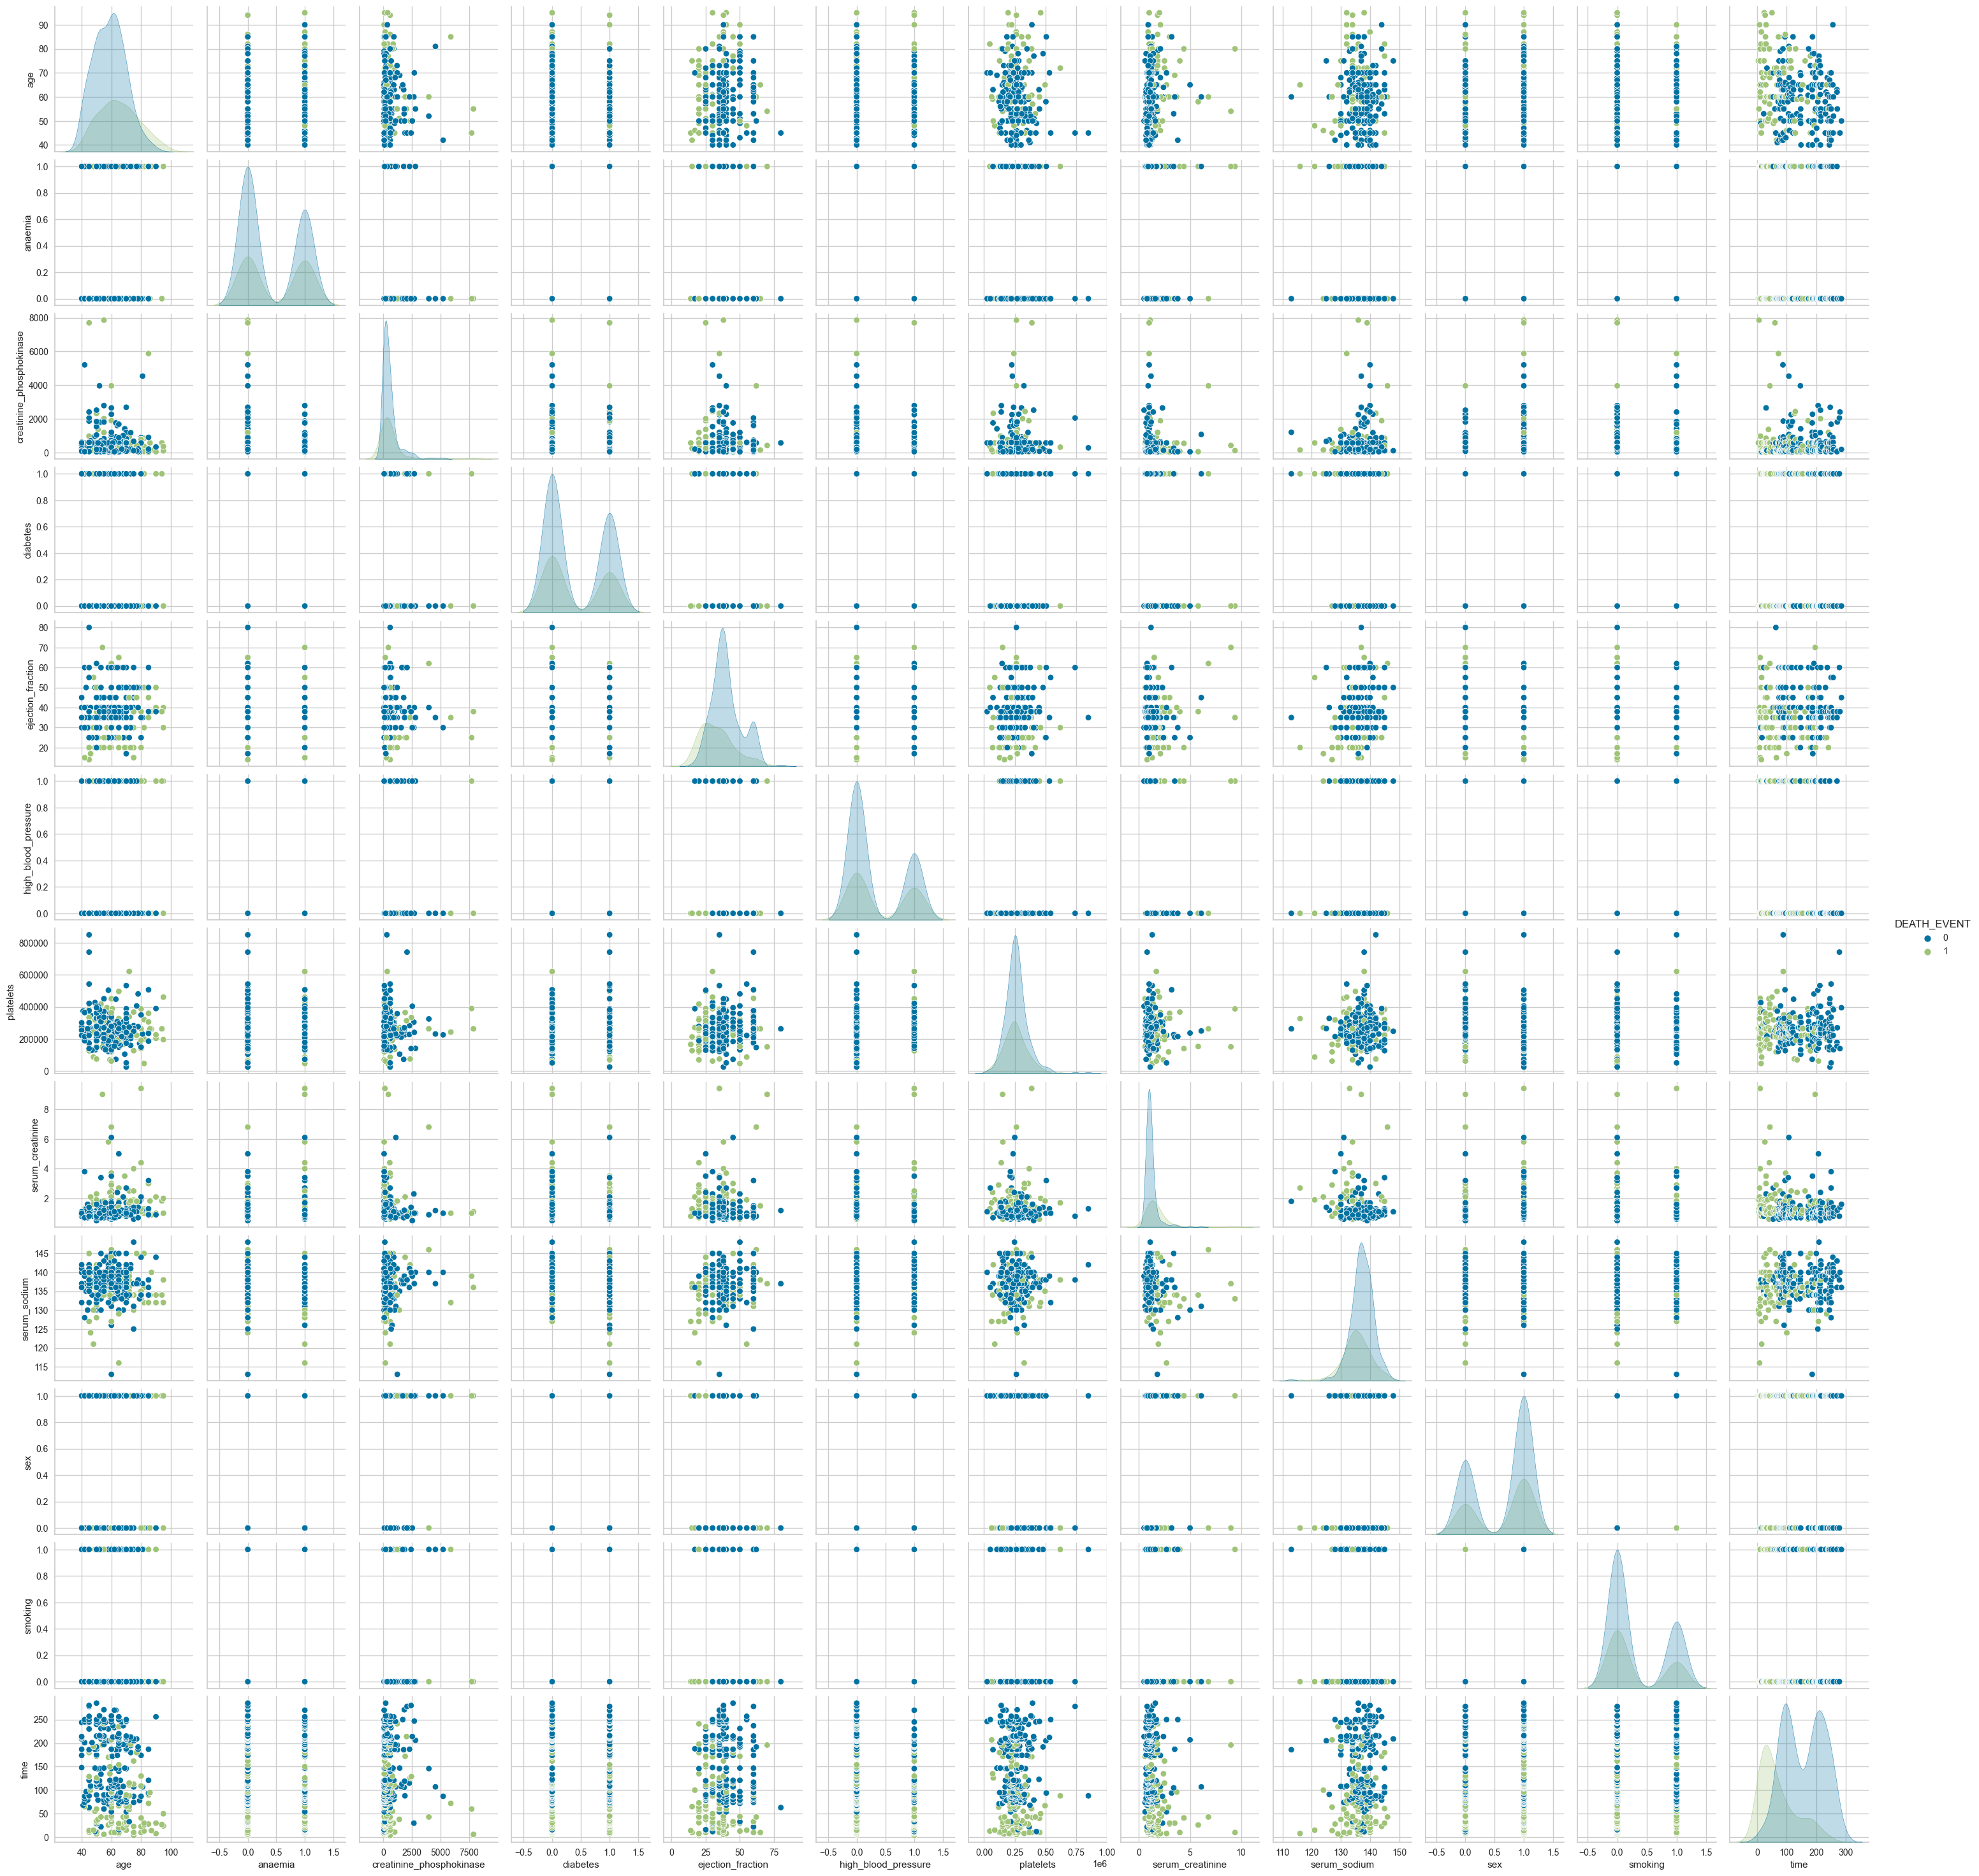

In [54]:
sns.pairplot(df, hue='DEATH_EVENT')

## 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
X = df.drop(columns=['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

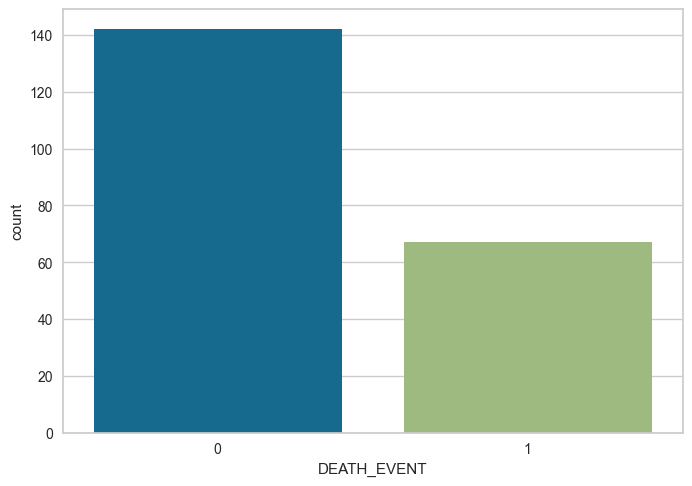

In [59]:
sns.countplot(x=y_train)

In [60]:
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
from sklearn.metrics import f1_score

estimador = DecisionTreeClassifier(random_state=42, max_depth=2)

estimador.fit(X_train_sc, y_train)

y_pred = estimador.predict(X_test_sc)

f1_score(y_test, y_pred)

0.6037735849056604

In [63]:
from sklearn import tree

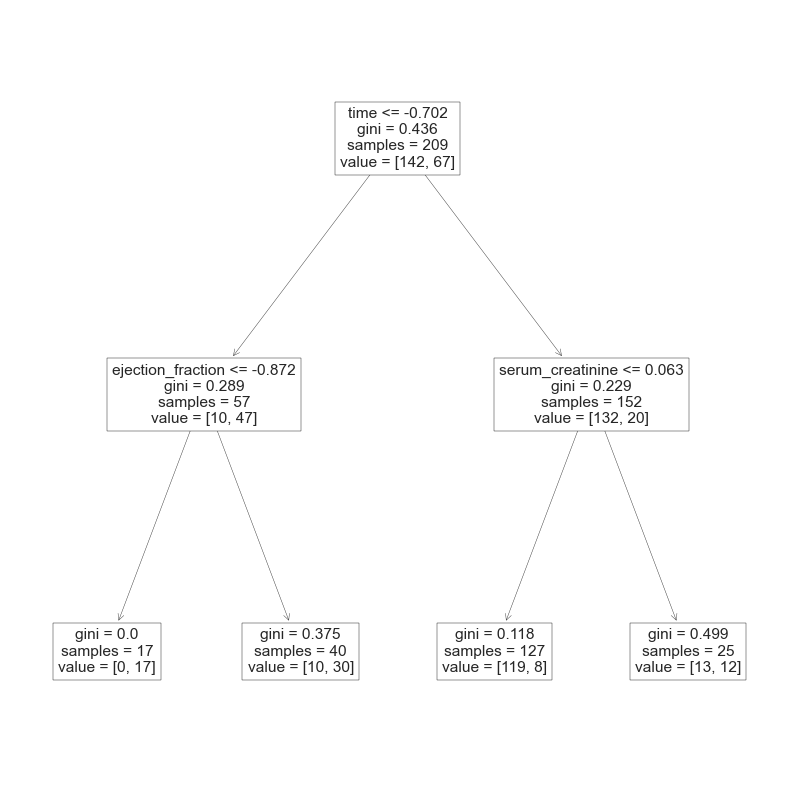

In [64]:
plt.figure(figsize=(10, 10))
tree.plot_tree(estimador, feature_names=X_train.columns)
plt.show()

In [65]:
print(tree.export_text(estimador, feature_names=X_train.columns.tolist()))

|--- time <= -0.70
|   |--- ejection_fraction <= -0.87
|   |   |--- class: 1
|   |--- ejection_fraction >  -0.87
|   |   |--- class: 1
|--- time >  -0.70
|   |--- serum_creatinine <= 0.06
|   |   |--- class: 0
|   |--- serum_creatinine >  0.06
|   |   |--- class: 0



In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

def escolha_hiper(hiper_list, X_train, y_train):
    training_error = []
    validation_error = []

    for hiper in hiper_list:
        numero_kfold = round(len(X_train)**0.5)
        kf = StratifiedKFold(n_splits=numero_kfold, shuffle=True, random_state=42)

        estimador = DecisionTreeClassifier(max_depth=hiper)

        cv_scores = cross_validate(estimator=estimador, X=X_train, y=y_train,
                                   scoring='f1',
                                    cv=kf, return_train_score=True)
        
        training_error.append(np.mean(cv_scores['train_score']))
        validation_error.append(np.mean(cv_scores['test_score']))
        
        
    plt.plot(hiper_list, training_error)
    plt.plot(hiper_list, validation_error)
    
    plt.title('Erros de treino e validação em função de Max_Depth')
    plt.ylabel('F1')
    plt.xlabel('max_depth')
    plt.legend(['Treinamento', 'Validação'])

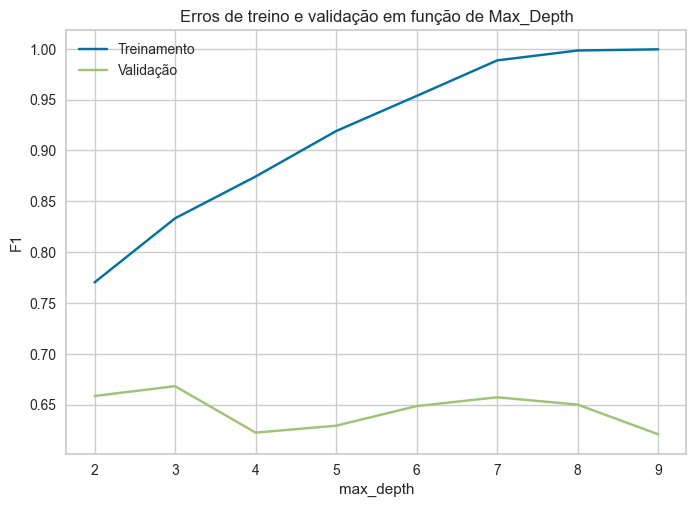

In [67]:
escolha_hiper(range(2, 10), X_train_sc, y_train)

In [68]:
estimador = DecisionTreeClassifier(random_state=42, max_depth=8)

estimador.fit(X_train_sc, y_train)

y_pred = estimador.predict(X_test_sc)

f1_score(y_test, y_pred)

0.6086956521739131

Como podemos balancear?

In [69]:
X = df.drop(columns=['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42, stratify=y)

In [71]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
146,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112,0
231,70.0,0,93,0,35,0,185000.0,1.1,134,1,1,208,0
106,55.0,0,748,0,45,0,263000.0,1.3,137,1,0,88,0
89,57.0,1,115,0,25,1,181000.0,1.1,144,1,0,79,0
285,55.0,1,170,1,40,0,336000.0,1.2,135,1,0,250,0


In [72]:
value_counts = df_train['DEATH_EVENT'].value_counts()
print(value_counts)

numero_de_y0 = value_counts[1]
print(numero_de_y0)

0    183
1     86
Name: DEATH_EVENT, dtype: int64
86


In [73]:
df_train_1 = df_train[df_train['DEATH_EVENT'] == 1].copy()

In [74]:
df_train_0 = df_train[df_train['DEATH_EVENT'] == 0].sample(n=numero_de_y0, replace=False)
df_train_0.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
240,70.0,0,81,1,35,1,533000.00,1.30,139,0,0,212,0
215,73.0,0,582,0,35,1,203000.00,1.30,134,1,0,195,0
200,63.0,1,1767,0,45,0,73000.00,0.70,137,1,0,186,0
249,53.0,0,207,1,40,0,223000.00,1.20,130,0,0,214,0
135,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0


In [75]:
df_bal_train = pd.concat([df_train_0, df_train_1], axis=0)
df_bal_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
240,70.0,0,81,1,35,1,533000.00,1.30,139,0,0,212,0
215,73.0,0,582,0,35,1,203000.00,1.30,134,1,0,195,0
200,63.0,1,1767,0,45,0,73000.00,0.70,137,1,0,186,0
249,53.0,0,207,1,40,0,223000.00,1.20,130,0,0,214,0
135,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0


In [76]:
df_bal_train['DEATH_EVENT'].value_counts()

0    86
1    86
Name: DEATH_EVENT, dtype: int64

In [77]:
y_test.value_counts()

0    20
1    10
Name: DEATH_EVENT, dtype: int64

In [78]:
X_train = df_bal_train.drop(columns=['DEATH_EVENT'], axis=1)
y_train= df_bal_train['DEATH_EVENT']

In [79]:
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

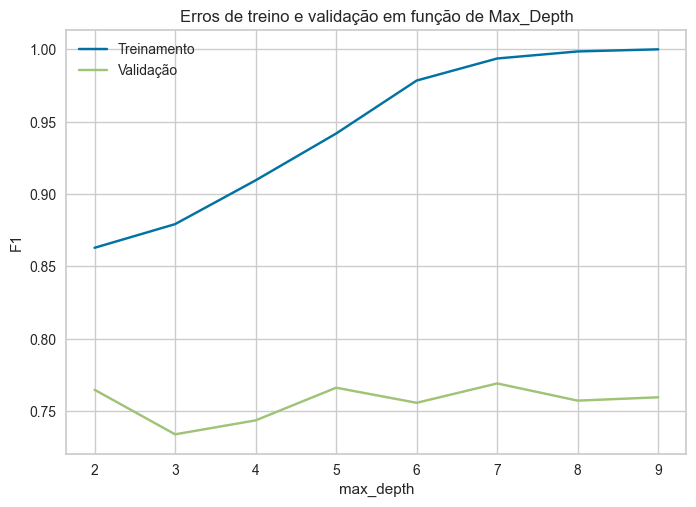

In [80]:
escolha_hiper(range(2, 10), X_train_sc, y_train)

In [81]:
from sklearn.metrics import r2_score
estimador = DecisionTreeClassifier(random_state=42, max_depth=8)

estimador.fit(X_train_sc, y_train)

y_pred = estimador.predict(X_test_sc)

f1_score(y_test, y_pred)


0.48

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.40      0.60      0.48        10

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30



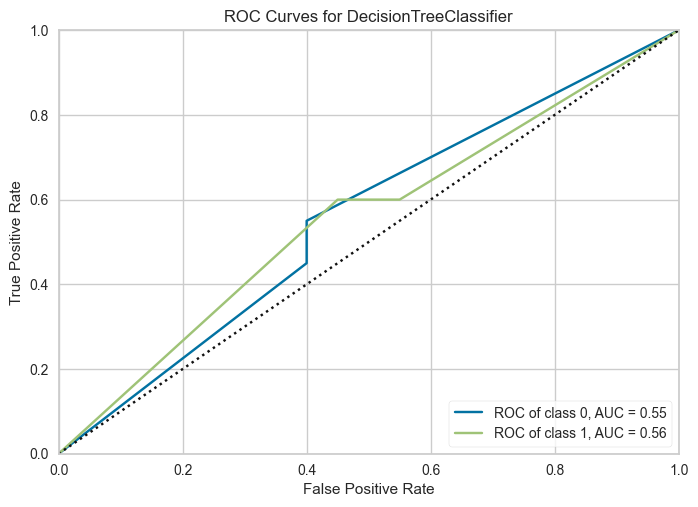

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(estimador, classes=[0, 1], micro=False, macro=False)

visualizer.fit(X_train_sc, y_train)
visualizer.score(X_test_sc, y_test)

visualizer.show()

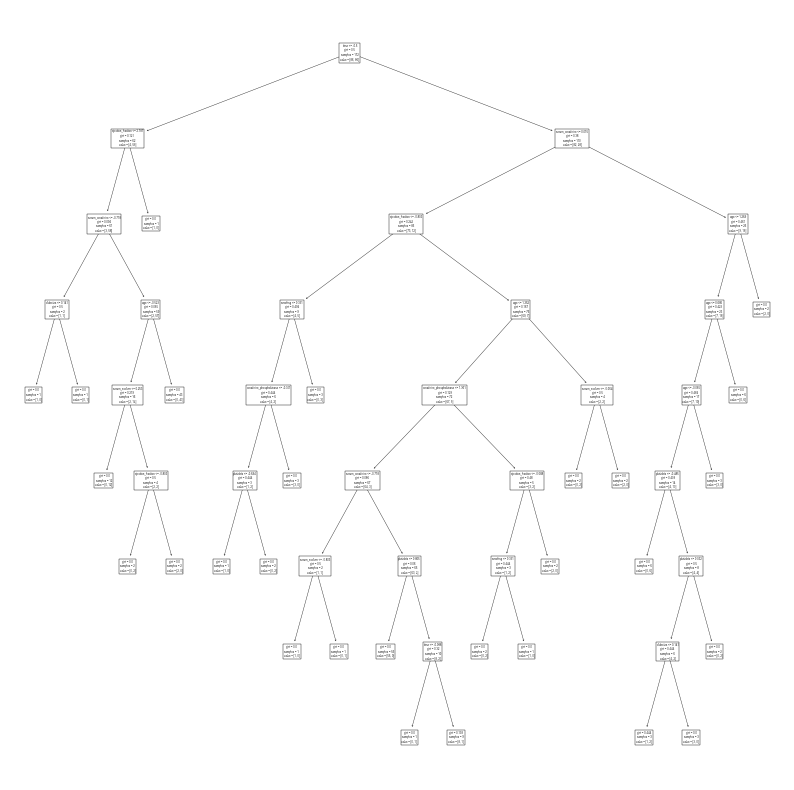

In [84]:
plt.figure(figsize=(10, 10))
tree.plot_tree(estimador, feature_names=X_train.columns)
plt.show()

In [85]:
print(tree.export_text(estimador, feature_names=X_train.columns.tolist()))

|--- time <= -0.50
|   |--- ejection_fraction <= 2.79
|   |   |--- serum_creatinine <= -0.72
|   |   |   |--- diabetes <= 0.14
|   |   |   |   |--- class: 0
|   |   |   |--- diabetes >  0.14
|   |   |   |   |--- class: 1
|   |   |--- serum_creatinine >  -0.72
|   |   |   |--- age <= -0.52
|   |   |   |   |--- serum_sodium <= 0.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- serum_sodium >  0.25
|   |   |   |   |   |--- ejection_fraction <= -0.81
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ejection_fraction >  -0.81
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- age >  -0.52
|   |   |   |   |--- class: 1
|   |--- ejection_fraction >  2.79
|   |   |--- class: 0
|--- time >  -0.50
|   |--- serum_creatinine <= 0.02
|   |   |--- ejection_fraction <= -0.81
|   |   |   |--- smoking <= 0.33
|   |   |   |   |--- creatinine_phosphokinase <= -0.30
|   |   |   |   |   |--- platelets <= -0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- platele

Feature Selection

In [86]:
importance = estimador.feature_importances_

importance

array([0.09138851, 0.        , 0.03025189, 0.02815013, 0.10016317,
       0.        , 0.06101995, 0.13643109, 0.05428954, 0.        ,
       0.03753351, 0.46077221])

<AxesSubplot:ylabel='Count'>

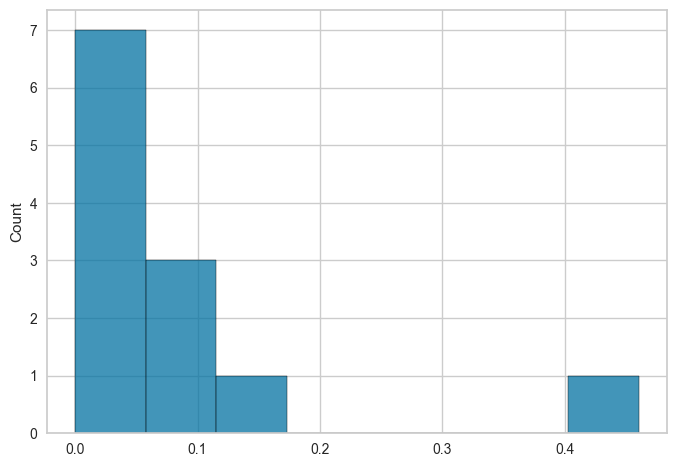

In [87]:
sns.histplot(np.array(importance))

In [88]:
for i, feature in enumerate(importance):
    print(f'{X_train.columns[i]}: {importance[i]}')

age: 0.09138850727946776
anaemia: 0.0
creatinine_phosphokinase: 0.03025189068064509
diabetes: 0.028150134048257367
ejection_fraction: 0.10016316611988119
high_blood_pressure: 0.0
platelets: 0.061019945202250805
serum_creatinine: 0.13643108806194867
serum_sodium: 0.054289544235924934
sex: 0.0
smoking: 0.03753351206434317
time: 0.46077221230728105


## Revisão - Métricas de Avaliação

Um importante processo durante a modelagem e termos alguma forma de avalairmos a qaulidade do que modelamos, e para isso utlizamos de **métricas de avaliação**.

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400">

No Sklearn, a notação muda um pouco:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Um jeito fácil de lembrar os tipos de erros:


<img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="400" width="400">


Visto isso, as seguintes métricas numéricas de avaliação são bastante comuns na avaliação de modelos de classificação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo;

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- F1-Score: média harmônica de precision e recall.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=450>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, a métrica a ser otimizada é o F1! 

<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" height="400" width="400">


## Exercício
  
Classifique os vinhos como bom e ruim!  
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009  